# Mount to drive

# Data

In [10]:
import pandas as pd
import numpy as np
from numpy import load
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("product_images.csv").to_numpy()

In [12]:
our_labels=load('labels.npy')

In [13]:
X_tsne=load('X_tsne.npy')

In [14]:
X=load('X.npy')

In [71]:
X_pca=load('X_pca.npy')

In [15]:
true_labels = pd.read_csv("true_label.csv").to_numpy()
true_labels = np.array([each[0] for each in true_labels])

In [16]:
np.unique(our_labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [17]:
np.unique(true_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Cluster plots

In [22]:
legend = ["tshirt/top", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankleboots"]

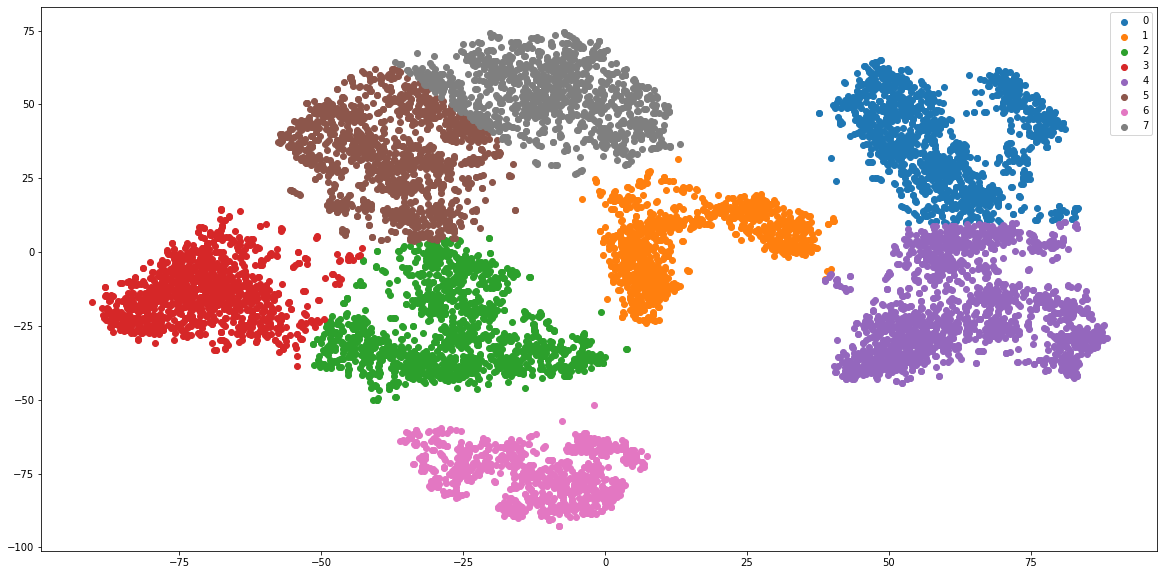

In [69]:
# our clusters
x_vals = [each[0] for each in X_tsne]
y_vals = [each[1] for each in X_tsne]

plt.figure(figsize=(20,10))

for k in np.unique(our_labels):
    x_vals = [X_tsne[i][0] for i in range(len(X_tsne)) if our_labels[i]==k]
    y_vals = [X_tsne[i][1] for i in range(len(X_tsne)) if our_labels[i]==k]
    plt.scatter(x_vals , y_vals, label = k)
plt.legend()
plt.show()

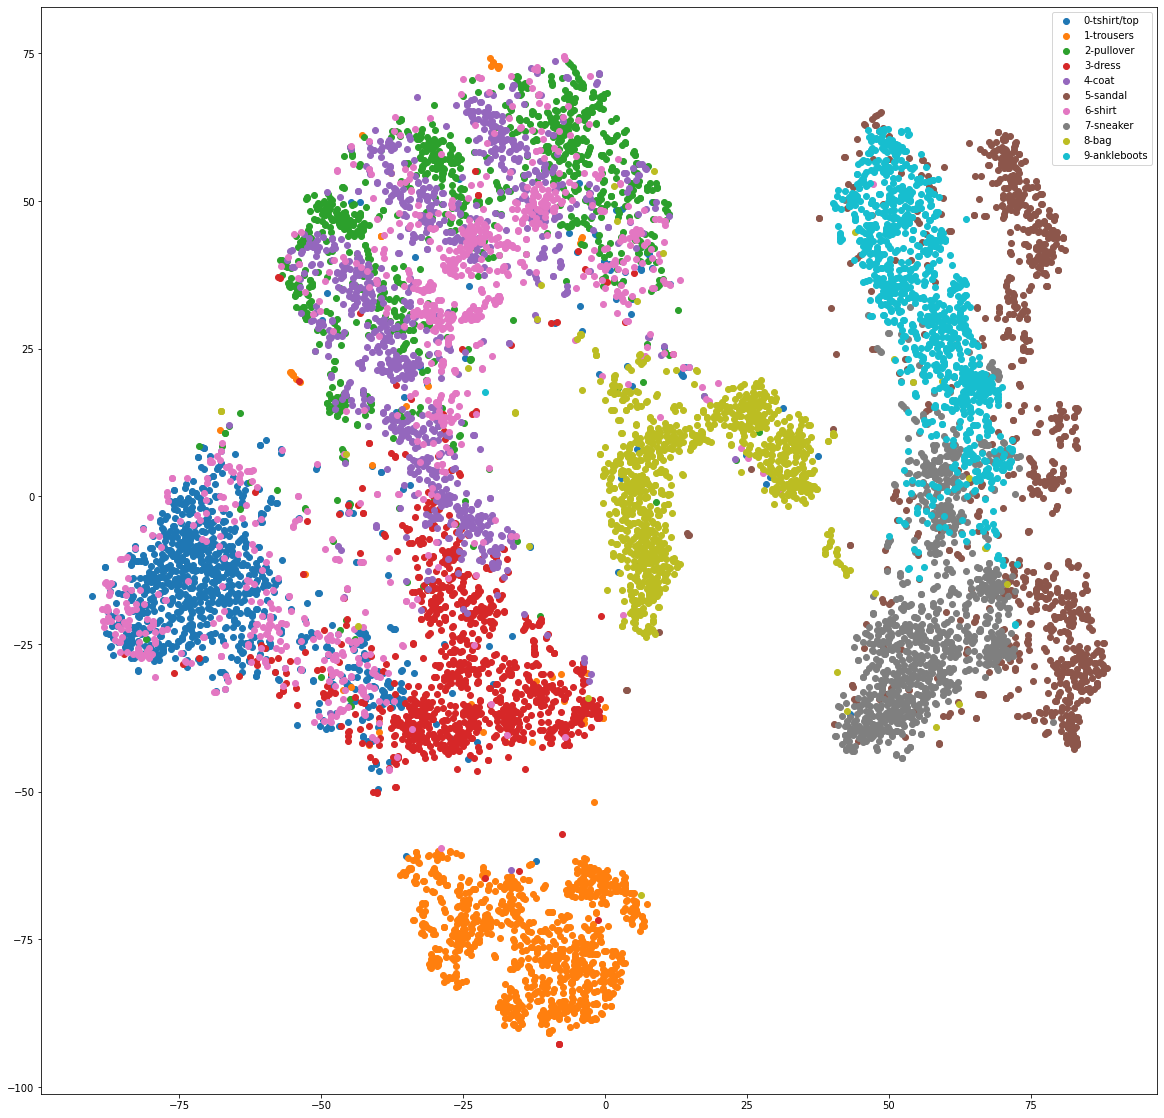

In [68]:
# true clusters

x_vals = [each[0] for each in X_tsne]
y_vals = [each[1] for each in X_tsne]

plt.figure(figsize=(20,10))

for k in np.unique(true_labels):
    x_vals = [X_tsne[i][0] for i in range(len(X_tsne)) if true_labels[i]==k]
    y_vals = [X_tsne[i][1] for i in range(len(X_tsne)) if true_labels[i]==k]
    plt.scatter(x_vals , y_vals, label = f"{k}-{legend[k]}")
plt.legend()
plt.show()

# Evaluation Metrics

In [49]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score

K-means with t-SNE feature extraction

In [66]:
n=10

In [61]:
def get_scores(n, data, true_labels):
  kmeans = MiniBatchKMeans(n_clusters = n, init="k-means++", random_state=999)
  kmeans.fit(data)
  s_score=silhouette_score(X_tsne, kmeans.labels_)
  h_score=homogeneity_score(true_labels, kmeans.labels_)
  c_score=completeness_score(true_labels, kmeans.labels_)
  return [n, round(s_score, 5), round(h_score, 5), round(c_score, 5)]

In [62]:
scores_tsne=[get_scores(n, X_tsne, true_labels) for n in range (7,11)]

In [63]:
pd.DataFrame(scores_tsne, columns=["n", "s_score", "h_score", "c_score"])

,n,s_score,h_score,c_score
0,7,0.47039,0.54944,0.65190
1,8,0.50194,0.62140,0.69551
2,9,0.49259,0.62268,0.66081
3,10,0.48085,0.63428,0.63760


K-means with PCA 

In [72]:
scores_pca=[get_scores(n, X_pca, true_labels) for n in range (7,11)]

In [73]:
pd.DataFrame(scores_pca, columns=["n", "s_score", "h_score", "c_score"])

,n,s_score,h_score,c_score
0,7,0.32961,0.46337,0.55582
1,8,0.34142,0.50843,0.58024
2,9,0.35924,0.54186,0.57839
3,10,0.33020,0.54311,0.55250


K-means without feature extraction

In [64]:
scores_allfeatures=[get_scores(n, X, true_labels) for n in range (7,11)]

In [65]:
pd.DataFrame(scores_allfeatures, columns=["n", "s_score", "h_score", "c_score"])

,n,s_score,h_score,c_score
0,7,0.35569,0.47658,0.58787
1,8,0.33473,0.48004,0.55748
2,9,0.33766,0.52029,0.56318
3,10,0.33574,0.53530,0.54562


# Count proportion of true labels in each of our labels

In [23]:
labels_df=pd.DataFrame(
    dict(
        our_labels=our_labels,
         true_labels=true_labels
    )
)

df = pd.DataFrame(
    dict(
        true_labels=list(set(true_labels))
    ),
    index=list(set(true_labels))
)

for n in list(set(our_labels)):
  counts = labels_df[labels_df["our_labels"]==n].groupby("true_labels").count().rename(columns={"our_labels":n})
  df = df.merge(counts, on="true_labels", how="outer")

df=df.drop(columns=["true_labels"])
df.fillna(0)
df_pct = df/df[df.columns].sum()*100
df_pct = df_pct.fillna(0).round(2)

In [24]:
df_pct["legend"] = legend

In [25]:
df_pct

,0,1,2,3,4,5,6,7,legend
0,0.00,1.78,10.22,72.46,0.06,1.04,0.21,3.03,tshirt/top
1,0.00,0.00,1.68,0.28,0.00,1.19,98.75,0.87,trousers
2,0.00,1.19,1.40,1.48,0.00,30.35,0.00,47.19,pullover
3,0.00,0.10,65.27,2.77,0.00,1.49,0.73,0.87,dress
4,0.00,0.59,12.18,0.37,0.00,41.24,0.10,22.68,coat
5,32.80,0.59,0.14,0.00,32.81,0.00,0.00,0.00,sandal
6,0.07,2.08,8.89,22.37,0.00,24.31,0.10,24.42,shirt
7,3.74,0.00,0.00,0.00,57.13,0.00,0.00,0.00,sneaker
8,0.29,93.67,0.21,0.28,1.63,0.30,0.10,0.95,bag
9,63.10,0.00,0.00,0.00,8.37,0.07,0.00,0.00,ankleboots


array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , 32.8 ,  0.07,  3.74,  0.29,
       63.1 ])

In [31]:
i = 1

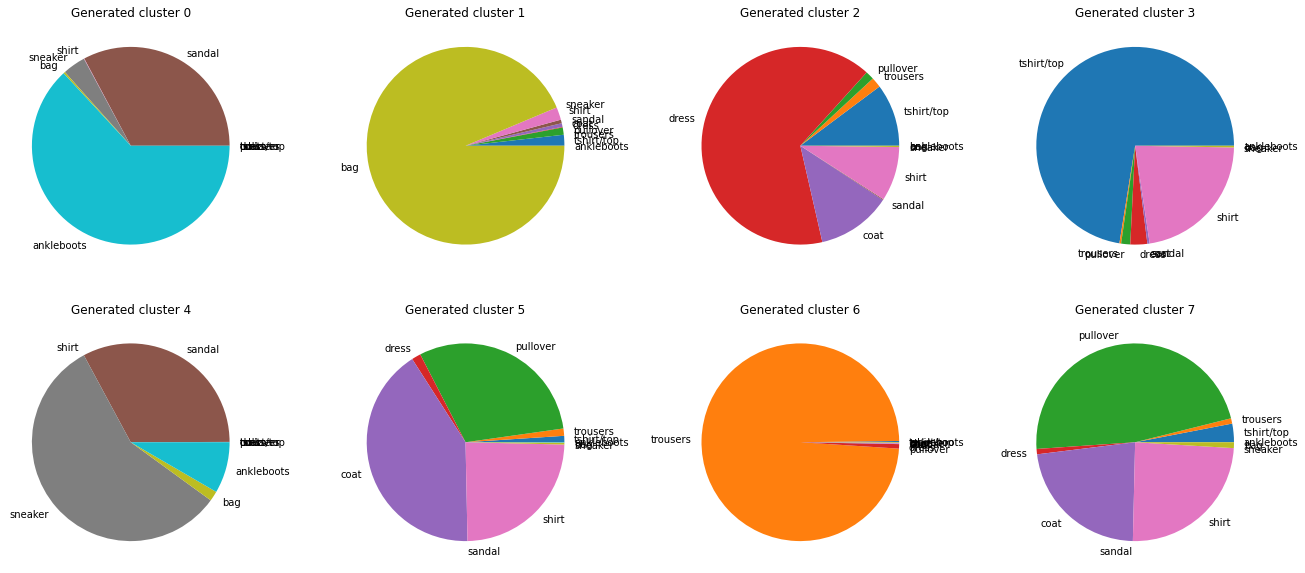

In [48]:
fig, axs = plt.subplots(2,4, figsize=(23,10))

n_counter=0

for x in range(2):
  for y in range(4):
    vals = df_pct[n_counter].values
    axs[x,y].pie(vals, labels = legend)
    axs[x,y].set_title(f"Generated cluster {n_counter}")
    n_counter+=1

fig.show() 